The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


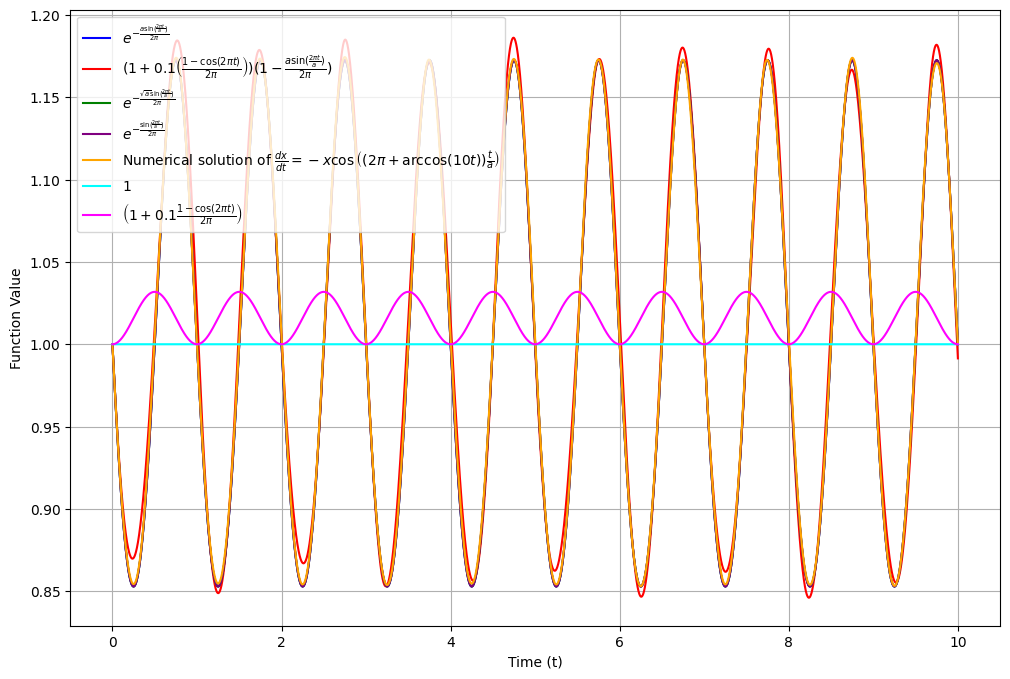

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the parameter 'a'
a = 1  # You can change this value to any desired value

# Define the time array 't'
t = np.linspace(0, 10, 10000)  # Time from 0 to 10 with 1000 points

# Define the functions
def f1(t, a):
    return np.exp(-a * np.sin(2 * np.pi * t / a) / (2 * np.pi))

def f2(t, a):
    return (1 + 0.1 * (1 - np.cos(2 * np.pi * t)) / (2 * np.pi)) * (1 - a * np.sin(2 * np.pi * t / a) / (2 * np.pi))

def f3(t, a):
    return np.exp(-np.sqrt(a) * np.sin(2 * np.pi * t / a) / (2 * np.pi))

def f4(t, a):
    return np.exp(-np.sin(2 * np.pi * t / a) / (2 * np.pi))

def f6(t):
    return np.ones_like(t)

def f7(t):
    return 1 + 0.1 * (1 - np.cos(2 * np.pi * t)) / (2 * np.pi)

# Differential equation for f5
def f5_eq(t, x, a):
    cos_val = np.cos((2 * np.pi + np.arccos(np.clip(10 * t, -1, 1))) * (t / a))
    return -x * cos_val

def f2_eq(t, x, a):
    return -x * np.cos(2*np.pi*t/a)+0.1*np.sin(10*t)

# Initial condition for f5
x0 = 1  # You can change the initial condition if needed

# Solve the differential equation using solve_ivp
sol = solve_ivp(f5_eq, [t[0], t[-1]], [x0], args=(a,), t_eval=t)

# Extract the numerical solution
f5_values = sol.y[0]
sol = solve_ivp(f2_eq, [t[0], t[-1]], [x0], args=(a,), t_eval=t)

# Extract the numerical solution
f2_values = sol.y[0]
# Calculate the function values
f1_values = f1(t, a)
#f2_values = f2(t, a)
f3_values = f3(t, a)
f4_values = f4(t, a)
f6_values = f6(t)
f7_values = f7(t)

# Plot the functions
plt.figure(figsize=(12, 8))
plt.plot(t, f1_values, label=r'$e^{-\frac{a \sin(\frac{2\pi t}{a})}{2\pi}}$', color='blue')
plt.plot(t, f2_values, label=r'$(1 + 0.1 \left(\frac{1 - \cos(2\pi t)}{2\pi}\right))(1 - \frac{a \sin(\frac{2\pi t}{a})}{2\pi})$', color='red')
plt.plot(t, f3_values, label=r'$e^{-\frac{\sqrt{a} \sin(\frac{2\pi t}{a})}{2\pi}}$', color='green')
plt.plot(t, f4_values, label=r'$e^{-\frac{\sin(\frac{2\pi t}{a})}{2\pi}}$', color='purple')
plt.plot(t, f5_values, label=r'Numerical solution of $\frac{dx}{dt} = -x\cos\left(\left(2\pi + \arccos(10t)\right) \frac{t}{a}\right)$', color='orange')
plt.plot(t, f6_values, label=r'$1$', color='cyan')
plt.plot(t, f7_values, label=r'$\left(1 + 0.1 \frac{1 - \cos(2\pi t)}{2\pi}\right)$', color='magenta')

plt.xlabel('Time (t)')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)

# Save the plot as an EPS file
plt.savefig('plot.eps', format='eps')

# Show the plot
plt.show()
